In [30]:
from ipynb.fs.full.data_cleaning import df, serviceDf, zipCodes
import pandas as pd
import numpy as np
from numpy import NaN
import matplotlib
import matplotlib.pyplot as plt

df.sample(3)

,Segments,Services,Type,Service,Hires,Price,Price Type,Rating,Zip Code,Capital City,State,Abbreviation,Implied Revenue
1622,Home Improvement,Commercial Cleaning,Peripheral,Yolanda Gómez cleaning,12.00,NaN,,5.00,75207,Dallas,Texas,TX,NaN
10744,Home Improvement,Commercial Cleaning,Peripheral,Summit Facility Solutions,NaN,NaN,,5.00,6604,Bridgeport,Connecticut,CT,NaN
23050,Home Improvement,Central Air Conditioning Installation or Repla...,Peripheral,US Air Heating and Cooling,32.00,NaN,,5.00,28105,Charlotte,North Carolina,NC,NaN


In [2]:
df.shape

(22106, 13)

**General quetions:**
1. Which segments is Thumbtack focusing on? Or is Thumbtack consistent in all segments & services?
2. Does the demand & supply in services change from a region to another?
3. Which segments are doing better or worse?
4. Is Thumbtack offering this many services because they have a low # hires/# sellers rate?
5. Are there any segments or services that showcase more uncaptured potential?
6. What types of sellers are the most successful? Individuals or business? Does it depend on the type of service and/or region?

# Which segments is Thumbtack focusing on?

## Count by Segment

We can first see a basic count of services for each segment.

In [3]:
# See ranking by count
segmentCount = df.groupby("Segments")["Segments"].count()
dfSegmentCount = segmentCount.to_frame(name="Count").reset_index()
dfSegmentCount["Contribution"] = dfSegmentCount["Count"] / dfSegmentCount["Count"].sum()
dfSegmentCount.sort_values(by="Count", ascending=False)

,Segments,Count,Contribution
2,Home Improvement,13748,0.62
1,Events,3486,0.16
5,Wellness,1594,0.07
3,Lessons,1492,0.07
0,Business,1253,0.06
4,Pets,533,0.02


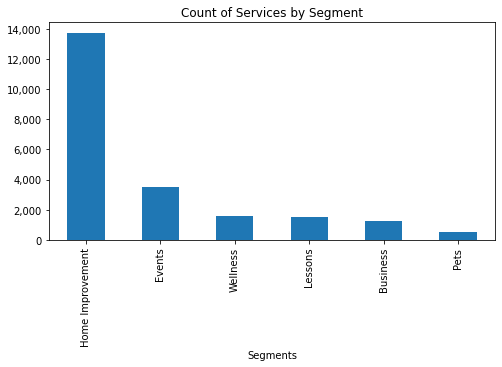

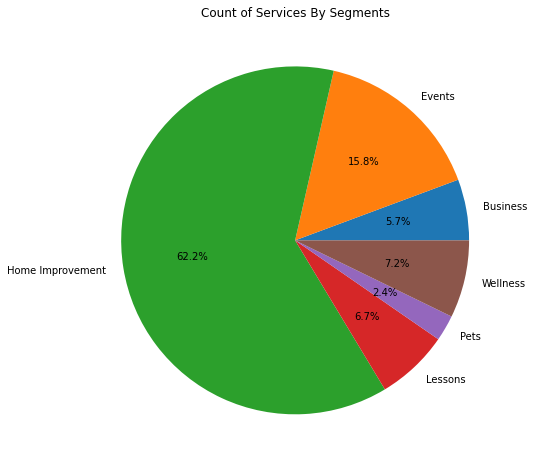

In [4]:
segmentCount.sort_values(ascending=False).plot.bar(
    title="Count of Services by Segment", figsize=(8, 4)
)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(["{:,.0f}".format(x) for x in current_values])
plt.show()

segmentCount.plot.pie(
    autopct="%.1f%%",
    title="Count of Services By Segments",
    y="Count",
    ylabel="",
    figsize=(8, 8),
)
plt.show()

## Count by Services

This is to see the counts for specific services like DJ, massage therapy, etc.

In [5]:
# See ranking by count
servicesCount = df.groupby("Services")["Services"].count()
dfServicesCount = servicesCount.to_frame(name="Count").reset_index()
dfServicesCount["Contribution"] = (
    dfServicesCount["Count"] / dfServicesCount["Count"].sum()
)
dfServicesCount = pd.merge(
    dfServicesCount, serviceDf[["Services", "Segments"]], on="Services"
)
dfServicesCount = dfServicesCount[["Segments", "Services", "Count", "Contribution"]]
dfServicesCount.sort_values(by="Count", ascending=False)[:19]

,Segments,Services,Count,Contribution
133,Events,Wedding Officiant,839,0.04
1,Business,Accounting,791,0.04
33,Home Improvement,Commercial Cleaning,775,0.04
84,Home Improvement,Furniture Moving and Heavy Lifting,715,0.03
135,Events,Wedding and Event Makeup,712,0.03
31,Home Improvement,Closet and Shelving System Installation,707,0.03
103,Wellness,Massage Therapy,696,0.03
44,Events,DJ,684,0.03
99,Home Improvement,Interior Design,624,0.03
118,Home Improvement,Roof Repair or Maintenance,504,0.02


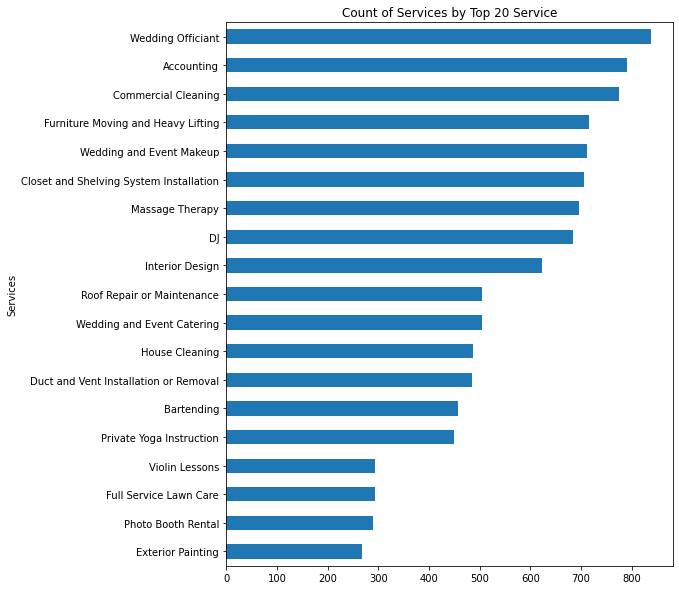

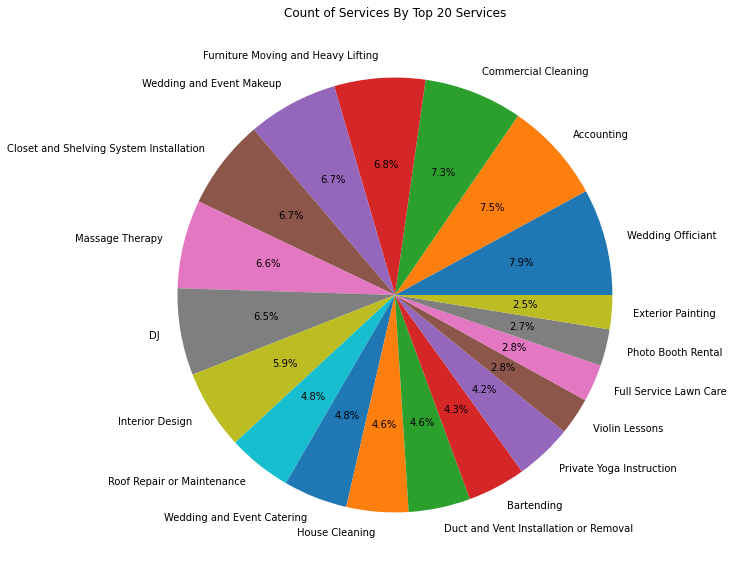

In [6]:
servicesCountChart = servicesCount.sort_values(ascending=False)[:19]
servicesCountChart.sort_values(ascending=True).plot.barh(
    title="Count of Services by Top 20 Service", xlabel="Services", figsize=(8, 10)
)
plt.show()

servicesCountChart.plot.pie(
    autopct="%.1f%%",
    title="Count of Services By Top 20 Services",
    y="Count",
    ylabel="",
    figsize=(10, 10),
)
plt.show()

# Does the demand & supply in services change from a region to another?

Outputs per regional segments & services:
- \# services
- \# hires
- \# hires/#services rate
- List of sellers per region

## Counts of Services by Zip Code

In [51]:
serviceCountZip = df.groupby("Zip Code")["Segments"].count()
dfServiceCountZip = serviceCountZip.to_frame(name="Count").reset_index()

dfServiceCountZip["Zip Code"] = dfServiceCountZip["Zip Code"].astype(str)
zipCodes["Representative ZIP Code"] = zipCodes["Representative ZIP Code"].astype(str)

dfServiceCountZip = pd.merge(
    dfServiceCountZip,
    zipCodes[["Capital City", "State", "Representative ZIP Code"]],
    left_on="Zip Code",
    right_on="Representative ZIP Code",
    how="left",
).drop("Representative ZIP Code", axis=1)

dfServiceCountZip["Contribution"] = (
    dfServiceCountZip["Count"] / dfServiceCountZip["Count"].sum()
)

dfServiceCountZip = dfServiceCountZip[
    ["State", "Capital City", "Zip Code", "Count", "Contribution"]
]
dfServiceCountZip.sort_values(by="Count", ascending=False)[:20]

,State,Capital City,Zip Code,Count,Contribution
18,Georgia,Atlanta,30303,794,0.04
79,California,Los Angeles,90013,786,0.04
65,Texas,Dallas,75207,696,0.03
23,Florida,Miami,33132,691,0.03
66,Texas,Houston,77002,668,0.03
69,Colorado,Denver,80202,658,0.03
73,Arizona,Phoenix,85001,590,0.03
80,California,San Diego,92101,550,0.02
24,Florida,Tampa,33602,548,0.02
7,District of Columbia,Washington,20001,532,0.02


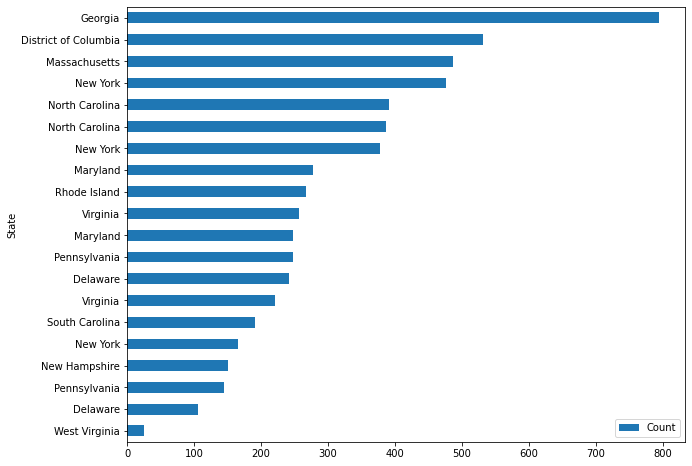

In [66]:
dfServiceCountZip[["State", "Count"]][:20].sort_values(
    by="Count", ascending=True
).plot.barh(x="State", y="Count", figsize=(10,8))
plt.show()

# Which segments are doing better or worse?

Maybe see implied revenue from these segments

In [7]:
# Get sum of implied revenue by segment
dfRevenuBySegment = (
    df.groupby("Segments")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuBySegment["Contribution"] = (
    dfRevenuBySegment["Implied Revenue"] / dfRevenuBySegment["Implied Revenue"].sum()
)

# Get sum of implied revenue by services
dfRevenuByServices = (
    df.groupby("Services")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuByServices["Contribution"] = (
    dfRevenuByServices["Implied Revenue"] / dfRevenuByServices["Implied Revenue"].sum()
)

# Get sum of implied revenue by states
dfRevenuByRevenue = (
    df.groupby("State")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuByRevenue["Contribution"] = (
    dfRevenuByRevenue["Implied Revenue"] / dfRevenuByRevenue["Implied Revenue"].sum()
)

In [8]:
# See implied revenue by segment
dfRevenuBySegment.sort_values(by="Contribution", ascending=False)

,Segments,Implied Revenue,Contribution
2,Home Improvement,"41,131,344.00",0.56
1,Events,"21,770,915.00",0.30
0,Business,"4,120,613.00",0.06
5,Wellness,"3,557,406.00",0.05
3,Lessons,"2,167,109.00",0.03
4,Pets,"304,754.00",0.00


In [9]:
# See top 10 implied revenue by services
dfRevenuByServices.sort_values(by="Contribution", ascending=False)[:9]

,Services,Implied Revenue,Contribution
84,Furniture Moving and Heavy Lifting,"9,070,643.00",0.12
133,Wedding Officiant,"9,046,401.00",0.12
44,DJ,"5,589,660.00",0.08
108,Photo Booth Rental,"3,617,129.00",0.05
14,Bed Bug Extermination,"3,336,025.00",0.05
32,Commercial Carpet Cleaning,"2,485,817.00",0.03
33,Commercial Cleaning,"2,204,931.00",0.03
103,Massage Therapy,"2,144,258.00",0.03
135,Wedding and Event Makeup,"1,802,999.00",0.02


In [10]:
# See top 10 implied revenue by zipcode
dfRevenuByRevenue.sort_values(by="Contribution", ascending=False)[:9]

,State,Implied Revenue,Contribution
4,California,"10,265,804.00",0.14
43,Texas,"8,133,447.00",0.11
9,Florida,"4,279,846.00",0.06
32,New York,"4,190,035.00",0.06
10,Georgia,"2,784,590.00",0.04
8,District of Columbia,"2,774,118.00",0.04
33,North Carolina,"2,729,326.00",0.04
30,New Jersey,"2,727,762.00",0.04
5,Colorado,"2,430,143.00",0.03


# Is Thumbtack offering this many services because they have a low #hires/#sellers rate?

## Hires by Segment

In [11]:
# See ranking by count
hiresCount = df.groupby("Segments")["Hires"].sum()
dfHiresCount = hiresCount.to_frame(name="Total Hires").reset_index()
dfHiresCount["Contribution"] = (
    dfHiresCount["Total Hires"] / dfHiresCount["Total Hires"].sum()
)
dfHiresCount.sort_values(by="Total Hires", ascending=False)

,Segments,Total Hires,Contribution
2,Home Improvement,"620,097.00",0.71
1,Events,"129,867.00",0.15
5,Wellness,"38,222.00",0.04
0,Business,"37,734.00",0.04
3,Lessons,"31,594.00",0.04
4,Pets,"12,814.00",0.01


### The Hires Ratio

The hires ratio is essentially the percentage of hires over the total number of listing available in that segment/services. This is to see which segment/services gets more customers than others. In other words, it would be a proxy for demand and supply.

In [12]:
# Merge count and hires
dfCountMerge = pd.merge(
    dfSegmentCount[["Segments", "Count"]],
    dfHiresCount[["Segments", "Total Hires"]],
    how="left",
    left_on="Segments",
    right_on="Segments",
)

dfCountMerge["Hire Ratio"] = dfCountMerge["Total Hires"] / dfCountMerge["Count"]
dfCountMerge.sort_values(by="Hire Ratio", ascending=False)

,Segments,Count,Total Hires,Hire Ratio
2,Home Improvement,13748,"620,097.00",45.10
1,Events,3486,"129,867.00",37.25
0,Business,1253,"37,734.00",30.11
4,Pets,533,"12,814.00",24.04
5,Wellness,1594,"38,222.00",23.98
3,Lessons,1492,"31,594.00",21.18


## Hires by Services

Look at the top 20.

In [13]:
# See ranking by count
hiresCountServices = df.groupby("Services")["Hires"].sum()
dfHiresCountServices = hiresCountServices.to_frame(name="Total Hires").reset_index()
dfHiresCountServices["Contribution"] = (
    dfHiresCountServices["Total Hires"] / dfHiresCountServices["Total Hires"].sum()
)

dfHiresCountServices = pd.merge(
    dfHiresCountServices,
    serviceDf[["Segments", "Services"]],
    on="Services",
    how="inner",
).drop_duplicates()

#### Top 20 Hires Count

In [14]:
dfHiresCountServices.sort_values(by="Segments", ascending=False)[:19]

,Services,Total Hires,Contribution,Segments
110,Private Pilates Instruction,555.00,0.00,Wellness
106,Personal Training,"7,458.00",0.01,Wellness
101,Life Coaching,"1,163.00",0.00,Wellness
103,Massage Therapy,"21,972.00",0.03,Wellness
114,Private Yoga Instruction,"3,866.00",0.00,Wellness
105,Nutritionist,"3,208.00",0.00,Wellness
25,Cat Grooming,"3,754.00",0.00,Pets
107,Pet Sitting,"4,796.00",0.01,Pets
5,Aquarium Services,"1,400.00",0.00,Pets
50,Dog Walking,"2,864.00",0.00,Pets


#### Bottom 20 Hires Count

In [15]:
dfHiresCountServices.sort_values(by="Total Hires", ascending=False)[-19:]

,Services,Total Hires,Contribution,Segments
9,Asphalt Installation,905.00,0.00,Home Improvement
119,Saxophone Lessons,896.00,0.00,Lessons
8,Asbestos Removal,817.00,0.00,Home Improvement
70,Finish Carpentry,808.00,0.00,Home Improvement
19,Cabinet Refinishing and Repair,783.00,0.00,Home Improvement
80,Framing Carpentry,766.00,0.00,Home Improvement
125,Social Sciences Tutoring,731.00,0.00,Lessons
128,Statistical Data Analysis,644.00,0.00,Business
87,Furniture Upholstery,634.00,0.00,Home Improvement
43,Custom Furniture Building,617.00,0.00,Home Improvement


### The Hires Ratio

In [16]:
# Merge count and hires
dfCountMergeServices = pd.merge(
    dfServicesCount[["Services", "Count"]],
    dfHiresCountServices[["Services", "Total Hires"]],
    how="left",
    left_on="Services",
    right_on="Services",
)

dfCountMergeServices["Hire Ratio"] = (
    dfCountMergeServices["Total Hires"] / dfCountMergeServices["Count"]
)

dfCountMergeServices = pd.merge(
    dfCountMergeServices.drop_duplicates(),
    serviceDf[["Segments", "Services"]].drop_duplicates(),
    on="Services",
    how="inner",
).drop_duplicates()

dfCountMergeServices = dfCountMergeServices[
    ~dfCountMergeServices.duplicated("Services", keep="first")
]

#### Top 20 Hires Ratio

In [17]:
dfCountMergeServices.sort_values(by="Hire Ratio", ascending=False)[:19]

,Services,Count,Total Hires,Hire Ratio,Segments
73,Fitness Equipment Assembly,134,"18,431.00",137.54,Home Improvement
84,Furniture Moving and Heavy Lifting,715,"95,891.00",134.11,Home Improvement
4,Appliance Repair or Maintenance,86,"10,577.00",122.99,Home Improvement
24,Carpet Repair or Partial Replacement,48,"5,372.00",111.92,Home Improvement
102,Logo Design,52,"5,573.00",107.17,Business
32,Commercial Carpet Cleaning,169,"17,677.00",104.60,Home Improvement
21,Carpet Cleaning,217,"22,648.00",104.37,Home Improvement
49,Dishwasher Installation,78,"8,018.00",102.79,Home Improvement
82,Furniture Assembly,236,"23,885.00",101.21,Home Improvement
83,Furniture Delivery,106,"10,371.00",97.84,Home Improvement


#### Bottom 20 Hires Ratio

In [18]:
dfCountMergeServices.sort_values(by="Hire Ratio", ascending=False)[-19:]

,Services,Count,Total Hires,Hire Ratio,Segments
79,Foundation Repair,88,"1,298.00",14.75,Home Improvement
96,General Contracting,238,"3,057.00",12.84,Home Improvement
1,Accounting,791,"10,069.00",12.73,Business
12,Basement Finishing or Remodeling,150,"1,905.00",12.70,Home Improvement
9,Asphalt Installation,73,905.00,12.40,Home Improvement
121,Sewing Lessons,44,520.00,11.82,Lessons
10,Asphalt Repair and Maintenance,101,"1,159.00",11.48,Home Improvement
63,Excavation Services,101,"1,062.00",10.51,Home Improvement
6,Architectural Services,124,"1,301.00",10.49,Home Improvement
38,Construction Services,113,983.00,8.70,Home Improvement


### Scatter of Count and Number of Hires

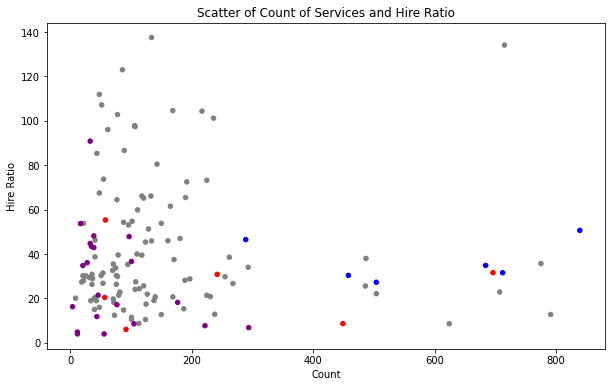

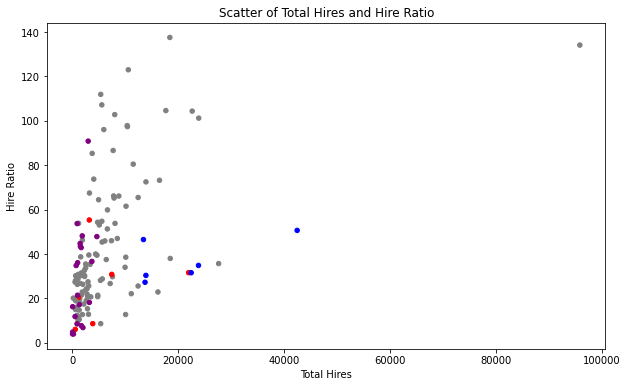

In [19]:
colors = {
    "Home Improvement": "gray",
    "Business": "gray",
    "Pets": "gray",
    "Events": "blue",
    "Wellness": "red",
    "Lessons": "purple",
}

dfCountMergeServices.plot.scatter(
    title="Scatter of Count of Services and Hire Ratio",
    x="Count",
    y="Hire Ratio",
    figsize=(10, 6),
    c=dfCountMergeServices["Segments"].map(colors),
)
plt.show()

dfCountMergeServices.plot.scatter(
    title="Scatter of Total Hires and Hire Ratio",
    x="Total Hires",
    y="Hire Ratio",
    figsize=(10, 6),
    c=dfCountMergeServices["Segments"].map(colors),
)
plt.show()

From the first scatterplot, it could mean that services with a higher count could mean that there is no clear indication of specialization. It could be that:
- There are too many services for customers to choose from, confusing them
- There are just a lot of competitors, so the sellers would have to share more

# Are there any segments or services that showcase more uncaptured potential?

# What types of sellers are the most successful? Individuals or business? Does it depend on the type of service and/or region?

# Top 10 Weight

In [20]:
hiresTopN = (
    df.groupby("Services")["Hires"]
    .nlargest(10)
    .sum(level=0)
    .to_frame(name="Top Hires")
    .reset_index()
)

hireSkew = (
    df.groupby("Services")["Hires"].skew().to_frame(name="Skewness").reset_index()
)

dfHiresSkew = pd.merge(
    dfHiresCountServices[["Services", "Total Hires", "Segments"]],
    hiresTopN,
    on="Services",
)

dfHiresSkew = pd.merge(
    dfHiresSkew, dfServicesCount[["Services", "Count"]], on="Services"
)

dfHiresSkew = pd.merge(dfHiresSkew, hireSkew, on="Services")

dfHiresSkew["Top Weight"] = dfHiresSkew["Top Hires"] / dfHiresSkew["Total Hires"]
dfHiresSkew = dfHiresSkew[
    [
        "Segments",
        "Services",
        "Count",
        "Top Hires",
        "Total Hires",
        "Top Weight",
        "Skewness",
    ]
]
dfHiresSkew[
    (dfHiresSkew["Count"] > 100)
    & (
        (dfHiresSkew["Segments"] == "Events")
        | (dfHiresSkew["Segments"] == "Lessons")
        | (dfHiresSkew["Segments"] == "Wellness")
    )
].sort_values(by="Top Weight", ascending=False)[:20]

,Segments,Services,Count,Top Hires,Total Hires,Top Weight,Skewness
119,Lessons,Saxophone Lessons,105,520.00,896.00,0.58,2.28
111,Lessons,Private Self Defense Lessons,222,728.00,"1,709.00",0.43,4.95
117,Lessons,Reiki Lessons,177,"1,353.00","3,219.00",0.42,4.23
109,Lessons,Piano Lessons,101,"1,542.00","3,701.00",0.42,2.14
114,Wellness,Private Yoga Instruction,449,"1,505.00","3,866.00",0.39,9.45
106,Wellness,Personal Training,242,"2,799.00","7,458.00",0.38,5.55
108,Events,Photo Booth Rental,289,"4,668.00","13,439.00",0.35,4.21
130,Lessons,Violin Lessons,294,521.00,"2,009.00",0.26,2.90
11,Events,Bartending,458,"3,192.00","13,905.00",0.23,3.24
134,Events,Wedding and Event Catering,504,"3,099.00","13,742.00",0.23,3.31


In [21]:
df[df["Services"] == "Saxophone Lessons"].sort_values(
    by="Hires", ascending=False
)[:10]

,Segments,Services,Type,Service,Hires,Price,Price Type,Rating,Zip Code,Capital City,State,Abbreviation,Implied Revenue
1018,Lessons,Saxophone Lessons,Peripheral,Nashville Music Academy,90.00,60.00,hour,5.00,37219,Nashville,Tennessee,TN,"5,400.00"
18975,Lessons,Saxophone Lessons,Peripheral,Musik Mogul,84.00,50.00,hour,5.00,33132,Miami,Florida,FL,"4,200.00"
10794,Lessons,Saxophone Lessons,Peripheral,Continuo Piano Tuning,76.00,80.00,hour,5.00,11021,Great Neck (NYC Suburb),New York,NY,"6,080.00"
77711,Lessons,Saxophone Lessons,Peripheral,Music Academy of Kansas City,63.00,59.00,hour,5.00,64105,Kansas City,Missouri,MO,"3,717.00"
39163,Lessons,Saxophone Lessons,Peripheral,Thomas Kresge Music,48.00,60.00,hour,5.00,10007,New York City,New York,NY,"2,880.00"
39160,Lessons,Saxophone Lessons,Peripheral,Joshua Shneider Music/NYC,38.00,70.00,hour,5.00,10007,New York City,New York,NY,"2,660.00"
30614,Lessons,Saxophone Lessons,Peripheral,Conservatory at Home Denver,33.00,59.00,hour,4.50,80202,Denver,Colorado,CO,"1,947.00"
55947,Lessons,Saxophone Lessons,Peripheral,Andrew Dixon Music Education/Performance,30.00,60.00,hour,5.00,94108,San Francisco,California,CA,"1,800.00"
1017,Lessons,Saxophone Lessons,Peripheral,DPV Music Lessons,29.00,79.00,hour,5.00,37219,Nashville,Tennessee,TN,"2,291.00"
11107,Lessons,Saxophone Lessons,Peripheral,GTRx - Play your favorite songs!,29.00,50.00,hour,5.00,28105,Charlotte,North Carolina,NC,"1,450.00"
